In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, ticker
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

/var/folders/1m/71syl3xd3910y8gqrq29f4w40000gn/T/ipykernel_13329/926987184.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Loading file to pandas dataframe

data = 'ASM01.csv'
df = pd.read_csv(data)

#Visualizing 
df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [3]:
# Oberving the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1014 non-null   object 
 1   Month            1014 non-null   object 
 2   Direction        1014 non-null   object 
 3   Mode             1014 non-null   object 
 4   UNIT             1014 non-null   object 
 5   VALUE            1014 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.7+ KB


In [4]:
#Checking if the STATISTIC Label column has only one value

df['STATISTIC Label'].unique()

array(['Air and Sea Travel'], dtype=object)

In [5]:
#Checking if the UNIT column has only one value

df['UNIT'].unique()

array(['Thousand'], dtype=object)

In [6]:
# Removing columns STATISTIC Label and UNIT on axis 1 -> columns
df = df.drop(['STATISTIC Label', 'UNIT'], axis=1)
df

,Month,Direction,Mode,VALUE
0,2010 January,Arrivals,All modes of transport,773.2
1,2010 January,Arrivals,Air,728.4
2,2010 January,Arrivals,Sea,44.8
3,2010 January,Departures,All modes of transport,791.7
4,2010 January,Departures,Air,732.4
...,...,...,...,...
1009,2024 January,Arrivals,Air,1271.3
1010,2024 January,Arrivals,Sea,31.1
1011,2024 January,Departures,All modes of transport,1281.7
1012,2024 January,Departures,Air,1239.5


In [7]:
# Convert the 'Month' column to a datetime object with Year-Month format
df['Year-Month'] = pd.to_datetime(df['Month'], format='%Y %B').dt.strftime('%Y-%m')

# Removing column Month
df.drop(columns='Month', inplace=True)

df.head(20)

,Direction,Mode,VALUE,Year-Month
0,Arrivals,All modes of transport,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,All modes of transport,791.7,2010-01
4,Departures,Air,732.4,2010-01
5,Departures,Sea,59.3,2010-01
6,Arrivals,All modes of transport,804.0,2010-02
7,Arrivals,Air,757.2,2010-02
8,Arrivals,Sea,46.9,2010-02
9,Departures,All modes of transport,803.2,2010-02


In [8]:
#Remove all lines with 'All modes of transport"
df = df.query("`Mode` != 'All modes of transport'")
df

,Direction,Mode,VALUE,Year-Month
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
4,Departures,Air,732.4,2010-01
5,Departures,Sea,59.3,2010-01
7,Arrivals,Air,757.2,2010-02
...,...,...,...,...
1007,Departures,Sea,59.8,2023-12
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1012,Departures,Air,1239.5,2024-01


In [9]:
# Pivot the table
df_pivoted = df.pivot_table(index='Year-Month', columns=['Direction', 'Mode'], values='VALUE')
#Join the columns
df_pivoted.columns = ['_'.join(col) for col in df_pivoted.columns.values]

# Kepping this irformation on name of all columns
df_pivoted.columns.name = "Values_in_Thousands"

# Display the pivoted DataFrame, indexed by Year-Month (String)
df_pivoted

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
Year-Month,,,,
2010-01,728.4,44.8,732.4,59.3
2010-02,757.2,46.9,757.2,46.1
2010-03,906.6,83.3,919.6,81.5
2010-04,735.8,168.7,709.5,172.5
2010-05,968.5,146.4,977.9,132.9
...,...,...,...,...
2023-09,1814.8,98.7,1799.0,111.1
2023-10,1742.1,76.5,1752.1,77.6
2023-11,1352.8,44.5,1316.5,45.0


In [10]:
# Oberving the data type of each column

#df_pivoted.dtypes
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2010-01 to 2024-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals_Air    169 non-null    float64
 1   Arrivals_Sea    169 non-null    float64
 2   Departures_Air  169 non-null    float64
 3   Departures_Sea  169 non-null    float64
dtypes: float64(4)
memory usage: 6.6+ KB


In [11]:
# Converting index of df_pivoted string to datetime format
# Then is possible to use methods YearLocater and DateFormatter to help adjuste the tick labels
df_pivoted.index = pd.to_datetime(df_pivoted.index)
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2010-01-01 to 2024-01-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals_Air    169 non-null    float64
 1   Arrivals_Sea    169 non-null    float64
 2   Departures_Air  169 non-null    float64
 3   Departures_Sea  169 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


In [35]:
# Attempt to infer the frequency
df_pivoted.index.inferred_freq

'MS'

In [13]:
# Dataframe cleaned and prepared to perform summarization
# Now All data is on numeric format
# Lets plot the reorganized data to see what can visualize


In [14]:
from sklearn.preprocessing import MinMaxScaler

#Using method MinMaxScaler to normalize the plot
scaler = MinMaxScaler()
#scaler = Normalizer()

# Create a new data frame "rescaled"
df_normalized = pd.DataFrame(scaler.fit_transform(df_pivoted), columns=df_pivoted.columns, index=df_pivoted.index)

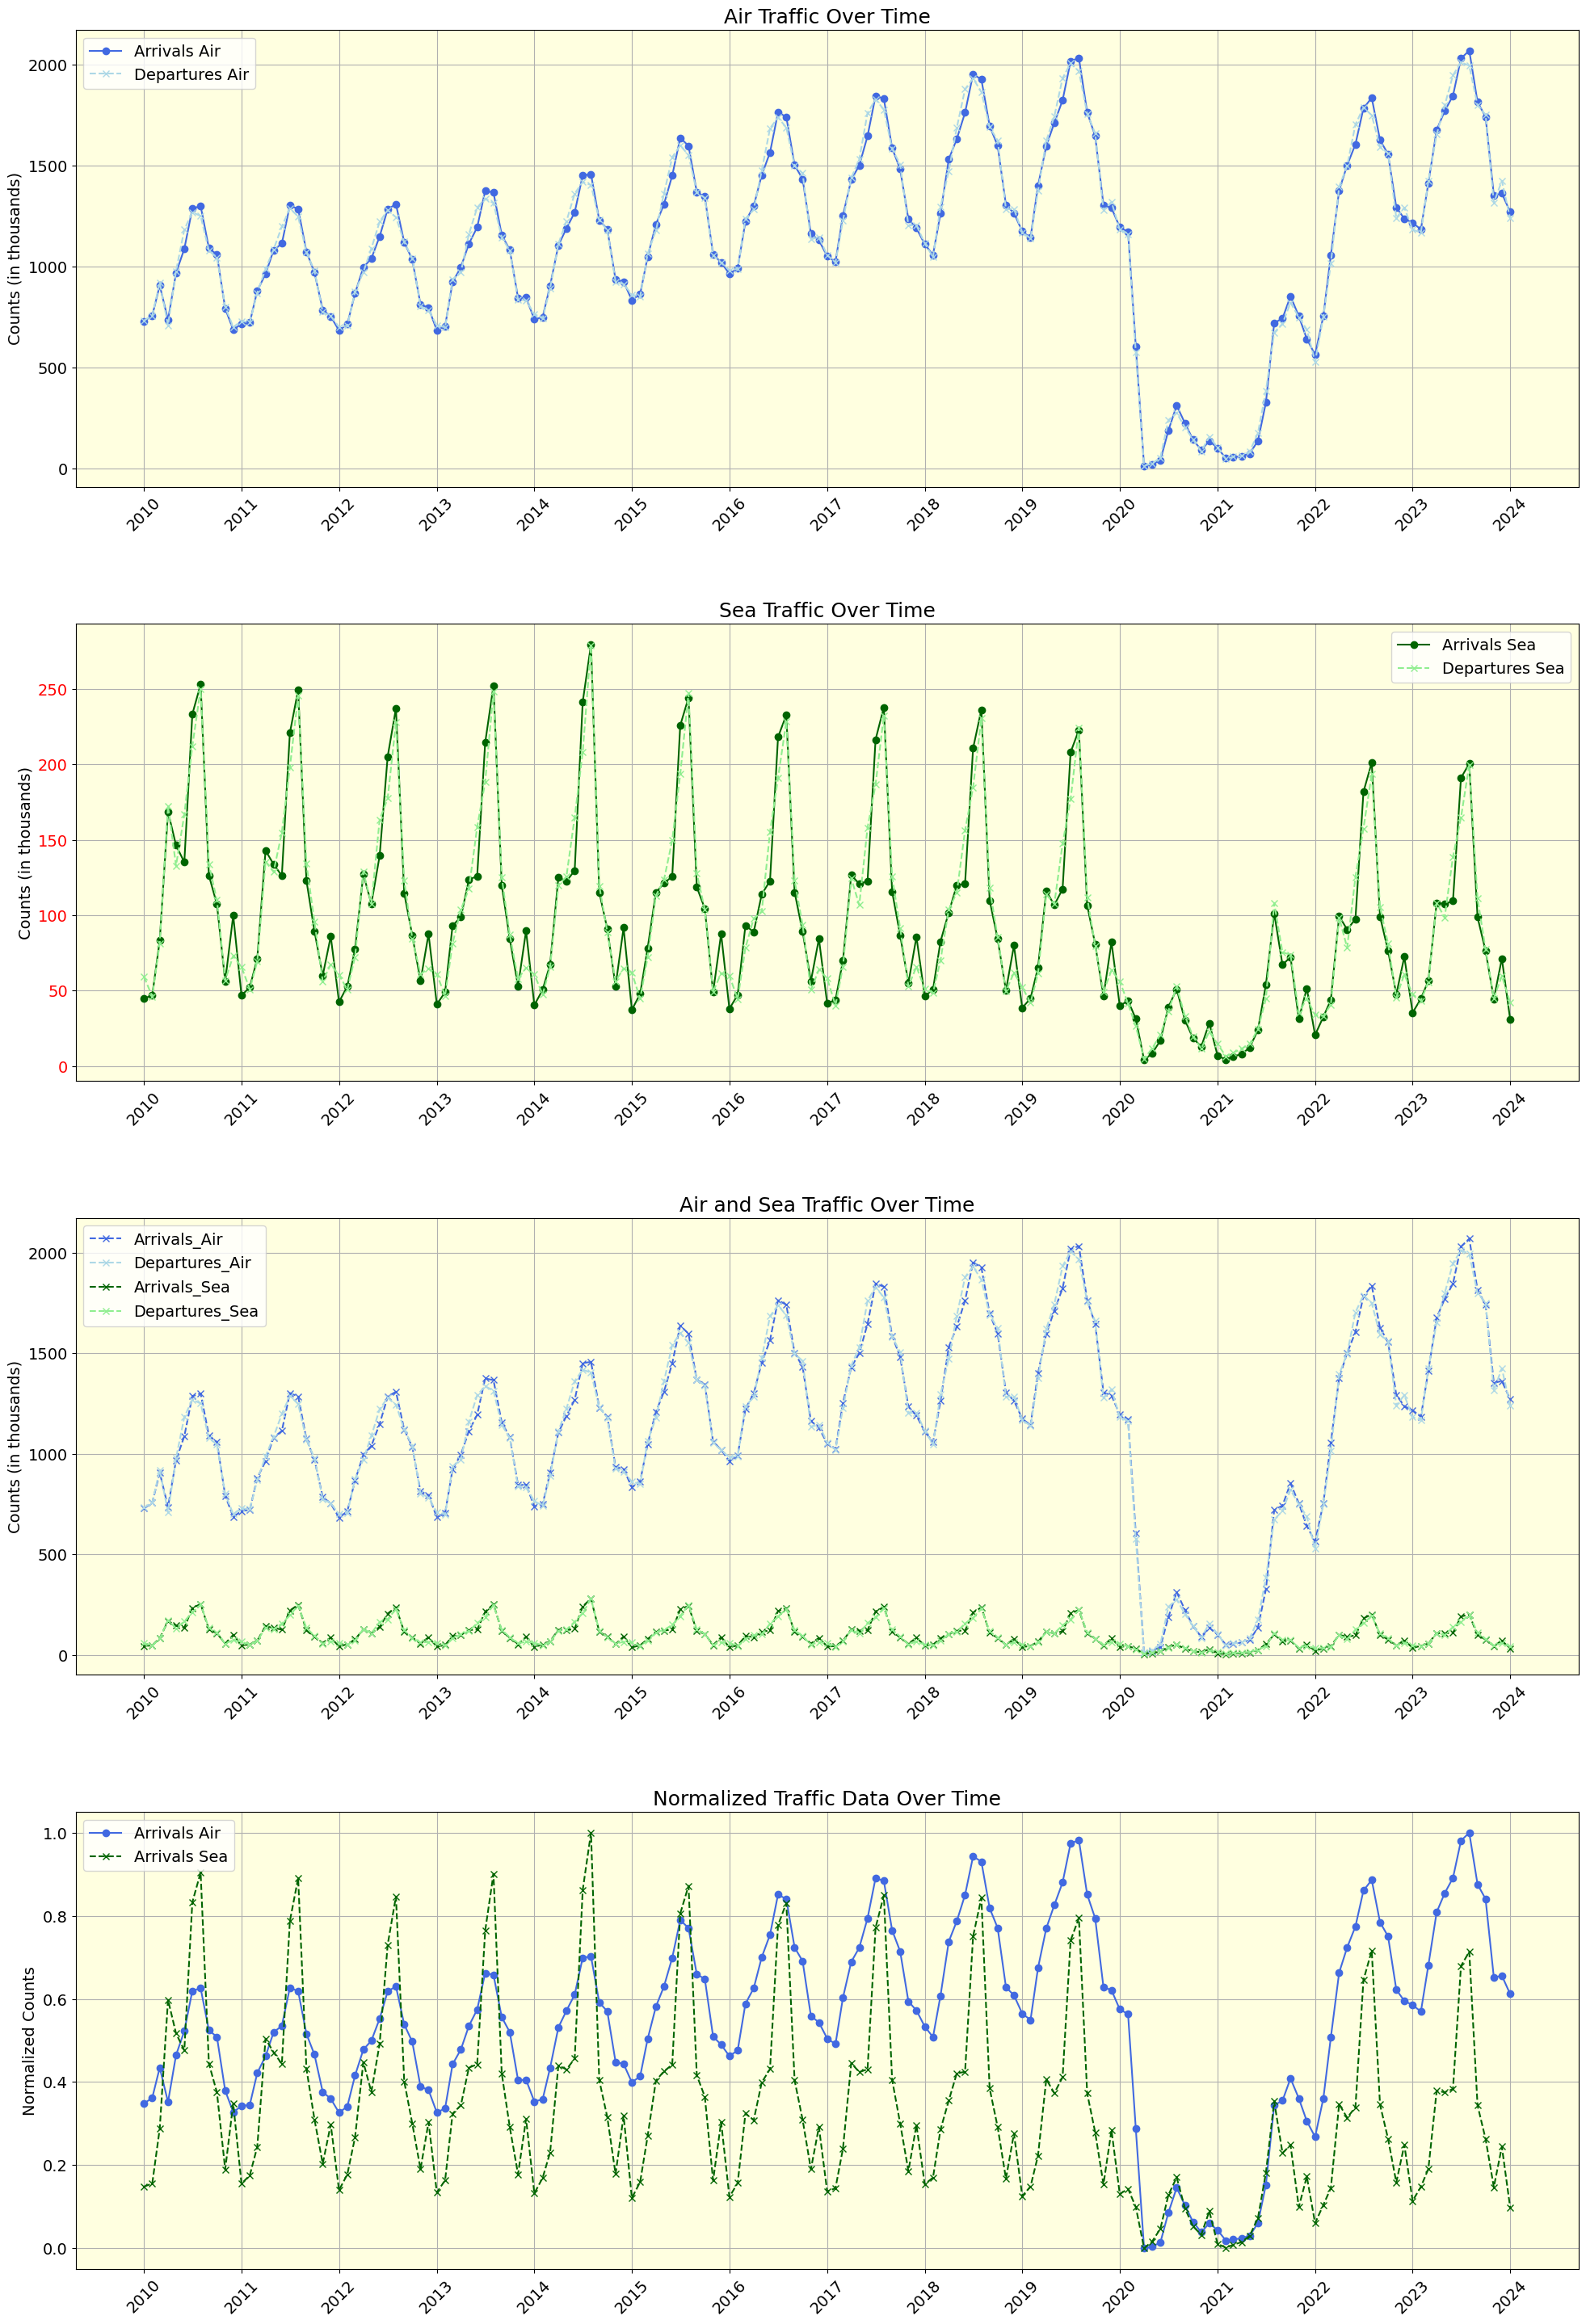

<Figure size 1400x700 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(24, 36))

# Adjusting the figure background color
fig.patch.set_facecolor('white')

# Plot configurations for the first subplot (Air Traffic)
axs[0].plot(df_pivoted.index, df_pivoted["Arrivals_Air"], label='Arrivals Air', color='royalblue', marker='o')
axs[0].plot(df_pivoted.index, df_pivoted["Departures_Air"], label='Departures Air', color='lightblue',  marker='x', linestyle='--')
axs[0].set_facecolor('#FFFFE0')
axs[0].set_title('Air Traffic Over Time', fontsize=18)
axs[0].set_ylabel('Counts (in thousands)', fontsize=14)
axs[0].xaxis.set_major_locator(YearLocator())
axs[0].xaxis.set_major_formatter(DateFormatter('%Y'))
axs[0].tick_params(axis='x', rotation=45, labelsize="14")
axs[0].tick_params(axis='y', labelsize="14")
axs[0].legend(fontsize=14)
axs[0].grid(True)

# Plot configurations for the second subplot (Sea Traffic)
axs[1].plot(df_pivoted.index, df_pivoted["Arrivals_Sea"], label='Arrivals Sea', color='darkgreen', marker='o')
axs[1].plot(df_pivoted.index, df_pivoted["Departures_Sea"], label='Departures Sea', color='lightgreen',  marker='x', linestyle='--')
axs[1].set_facecolor('#FFFFE0')
axs[1].set_title('Sea Traffic Over Time', fontsize=18)
axs[1].set_ylabel('Counts (in thousands)', fontsize=14)
axs[1].xaxis.set_major_locator(YearLocator())
axs[1].xaxis.set_major_formatter(DateFormatter('%Y'))
axs[1].tick_params(axis='x', rotation=45, labelsize="14")
axs[1].tick_params(axis='y', labelcolor='red', labelsize="14")
axs[1].legend(fontsize=14)
axs[1].grid(True)

# Plot configurations for the third subplot (Air and Sea Traffic, excluding totals)
traffic_types = ["Arrivals_Air", "Departures_Air", "Arrivals_Sea", "Departures_Sea"]
colors = ['royalblue', 'lightblue', 'darkgreen', 'lightgreen']
for column, color in zip(traffic_types, colors):
    axs[2].plot(df_pivoted.index, df_pivoted[column], label=column, marker='x', linestyle='--', color=color) 
axs[2].set_facecolor('#FFFFE0')
axs[2].set_title('Air and Sea Traffic Over Time', fontsize=18)
axs[2].set_ylabel('Counts (in thousands)', fontsize=14)
axs[2].xaxis.set_major_locator(YearLocator())
axs[2].xaxis.set_major_formatter(DateFormatter('%Y'))
axs[2].tick_params(axis='x', rotation=45, labelsize="14")
axs[2].tick_params(axis='y', labelsize="14")
axs[2].legend(fontsize=14)
axs[2].grid(True)

plt.figure(figsize=(14, 7))

# Fourth subplot: Plot normalized traffic data for Air and Sea modes
# Set current axis to the fourth subplot
ax = axs[3]
ax.plot(df_normalized.index, df_normalized['Arrivals_Air'], label='Arrivals Air', marker='o', linestyle='-', color='royalblue')
ax.plot(df_normalized.index, df_normalized['Arrivals_Sea'], label='Arrivals Sea', marker='x', linestyle='--', color='darkgreen')
ax.set_title('Normalized Traffic Data Over Time', fontsize=18)
ax.set_ylabel('Normalized Counts', fontsize=14)
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=45, labelsize="14")
ax.tick_params(axis='y', labelsize="14")
ax.legend(fontsize=14)
ax.grid(True)
ax.set_facecolor('#FFFFE0')

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)

plt.show()

In [16]:
# Computing the correlation matrix
corr_matrix = df_pivoted.corr(method='pearson')

print(corr_matrix)

Values_in_Thousands  Arrivals_Air  Arrivals_Sea  Departures_Air  \
Values_in_Thousands                                               
Arrivals_Air             1.000000      0.653325        0.996781   
Arrivals_Sea             0.653325      1.000000        0.636192   
Departures_Air           0.996781      0.636192        1.000000   
Departures_Sea           0.664050      0.974867        0.654643   

Values_in_Thousands  Departures_Sea  
Values_in_Thousands                  
Arrivals_Air               0.664050  
Arrivals_Sea               0.974867  
Departures_Air             0.654643  
Departures_Sea             1.000000  


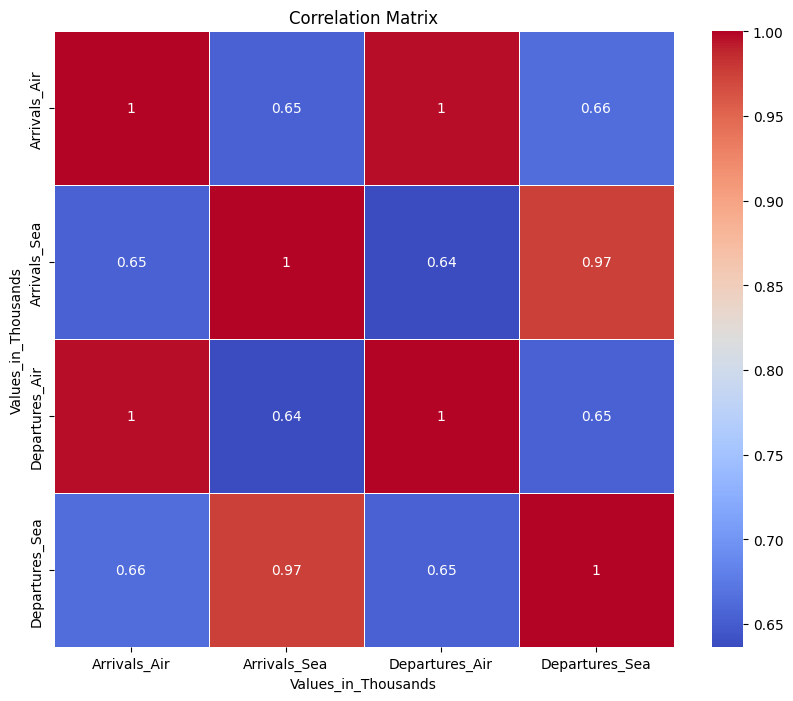

In [17]:
#Plotting the correlation matrix map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

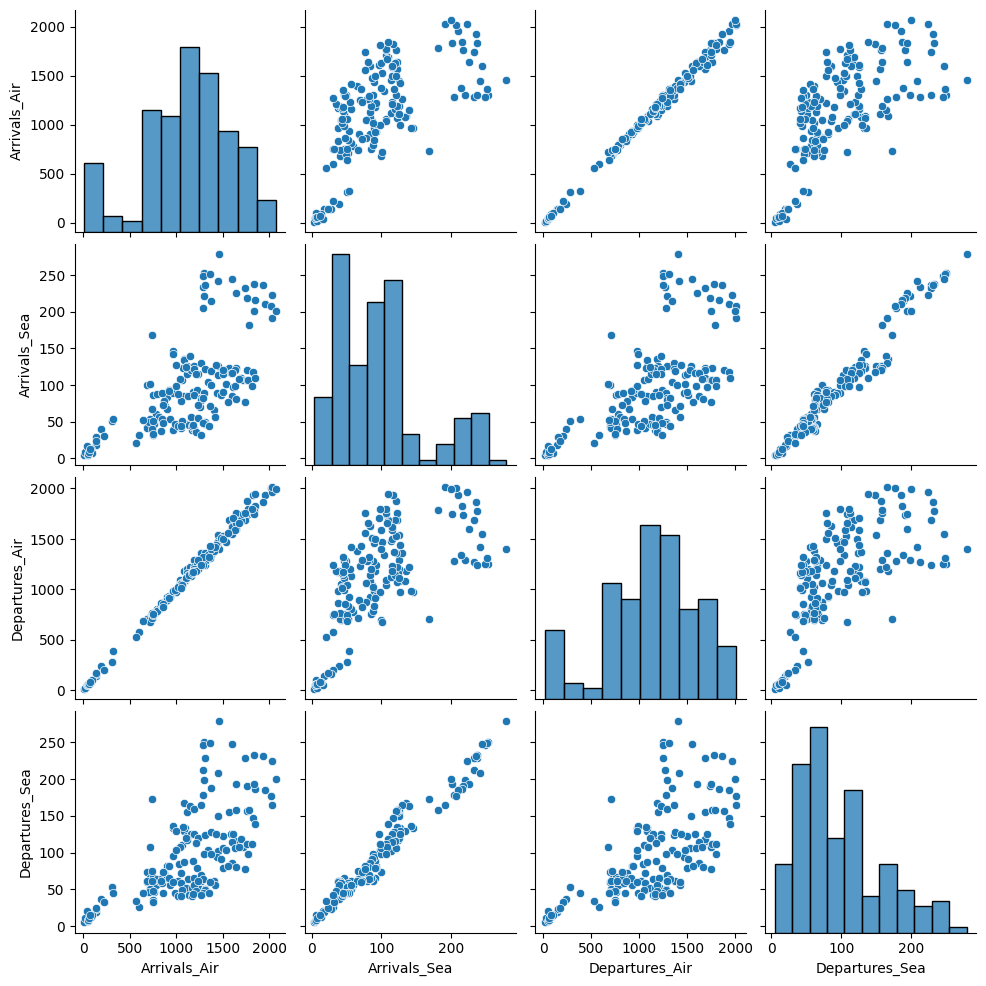

In [18]:
# Creates a grid with histogramns and correlation scatter plots for each pair of columns
sns.pairplot(df_pivoted)

In [19]:
#Visualizing Descriptive Analytics
df_pivoted.describe()

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
count,169.000000,169.000000,169.000000,169.000000
mean,1129.835503,97.657988,1132.353254,97.401183
std,474.693749,63.111201,474.854512,60.381058
min,12.100000,4.000000,12.800000,4.900000
25%,846.000000,48.900000,836.500000,52.300000
50%,1171.700000,87.600000,1178.500000,79.800000
75%,1450.300000,122.500000,1438.700000,127.800000
max,2070.200000,279.500000,2012.400000,278.900000


In [20]:
# / Calculating the Mean, Median and Mode to see the central tendencies / #

# Considerations

# Trend and Seasonality: 
 
# In time series analysis, it's also important to consider trend and seasonality. 

# These factors can significantly affect your central tendency measures. 
# For example, a steadily increasing trend could make the mean over the entire series less representative of any specific point in time.

# Outliers: Especially with mean calculations, consider the impact of outliers. 

# If your time series data includes extreme values, they could skew the mean.

# How can seen in the described statistics, min values got close to 0




In [21]:
# Getting Mean Values from each column
mean_df = df_pivoted.mean()

print("\nMean values for: (Thousands)")
print(mean_df)


Mean values for: (Thousands)
Values_in_Thousands
Arrivals_Air      1129.835503
Arrivals_Sea        97.657988
Departures_Air    1132.353254
Departures_Sea      97.401183
dtype: float64


In [22]:
# Getting Median Values from each column
median_df = df_pivoted.median()

print("\nMedian values for: (Thousands)")
print(median_df)


Median values for: (Thousands)
Values_in_Thousands
Arrivals_Air      1171.7
Arrivals_Sea        87.6
Departures_Air    1178.5
Departures_Sea      79.8
dtype: float64


In [23]:
# Getting Mode Value(s) from each column
mode_df = df_pivoted.mode()

#print("\nMode values for: (Thousands)")
mode_df.head(20)

#Too many modes to some columns because its a time series dataframe

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
0,1646.3,31.3,700.5,56.3
1,NaN,84.3,709.5,NaN
2,NaN,86.8,NaN,NaN
3,NaN,115.3,NaN,NaN
4,NaN,119.9,NaN,NaN


In [24]:
# In this context:

# The mean will give you the average value of each column, 
# which can be influenced by outliers or very high or low values.

# The median will provide the middle value of the dataset when sorted, 
# offering a better measure of central tendency if your data is skewed.

# The mode will show the most frequently occurring number of arrivals by air.
# If there's only one mode, it indicates a clear peak in your data distribution.

# By comparing these three measures, you can gain insights into the distribution of your "Arrivals Air" data.
# If the mean is significantly higher than the median,
# it might suggest the presence of high outliers affecting the average.

In [25]:
#Mean, Median and Mode of Arrivals Air

print(f"Mean of Arrivals Air: {mean_df['Arrivals_Air']}")
print(f"Median of Arrivals Air: {median_df['Arrivals_Air']}")
print(f"Mode(s) of Arrivals Air: {mode_df['Arrivals_Air'].dropna().to_list()}")

Mean of Arrivals Air: 1129.83550295858
Median of Arrivals Air: 1171.7
Mode(s) of Arrivals Air: [1646.3]


In [26]:
#Mean, Median and Mode of Departures Air

print(f"Mean of Departures Air: {mean_df['Departures_Air']}")
print(f"Median of Departures Air: {median_df['Departures_Air']}")
print(f"Mode(s) of Departures Air: {mode_df['Departures_Air'].dropna().to_list()}")

Mean of Departures Air: 1132.3532544378697
Median of Departures Air: 1178.5
Mode(s) of Departures Air: [700.5, 709.5]


In [27]:
#Mean, Median and Mode of Arrivals Sea

print(f"Mean of Arrivals Sea: {mean_df['Arrivals_Sea']}")
print(f"Median of Arrivals Sea: {median_df['Arrivals_Sea']}")
print(f"Mode(s) of Arrivals Sea: {mode_df['Arrivals_Sea'].dropna().to_list()}")

Mean of Arrivals Sea: 97.65798816568048
Median of Arrivals Sea: 87.6
Mode(s) of Arrivals Sea: [31.3, 84.3, 86.8, 115.3, 119.9]


In [28]:
#Mean, Median and Mode of Departures Sea

print(f"Mean of Departures Sea: {mean_df['Departures_Sea']}")
print(f"Median of Departures Sea: {median_df['Departures_Sea']}")
print(f"Mode(s) of Departures Sea: {mode_df['Departures_Sea'].dropna().to_list()}")

Mean of Departures Sea: 97.40118343195266
Median of Departures Sea: 79.8
Mode(s) of Departures Sea: [56.3]


In [42]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test on a series and print the results
def adf_test(series, name):
    result = adfuller(series, autolag='AIC')
    adf_stat, p_value, usedlag, nobs, critical_values, icbest = result
    print(f"Results for {name}:")
    print(f"ADF Statistic: {adf_stat}")
    print(f"p-value: {p_value}")
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}')
    print(f"{'Stationary' if p_value < 0.05 else 'Not Stationary'}\n")

# Perform the test on all columns
for column in df_normalized.columns:
    adf_test(df_normalized[column], column)

Results for Arrivals_Air:
ADF Statistic: -3.652024114925789
p-value: 0.0048408810286395465
Critical Value (1%): -3.473542528196209
Critical Value (5%): -2.880497674144038
Critical Value (10%): -2.576878053634677
Stationary

Results for Arrivals_Sea:
ADF Statistic: -2.2244672640346455
p-value: 0.19748538541512856
Critical Value (1%): -3.4732590518613002
Critical Value (5%): -2.880374082105334
Critical Value (10%): -2.5768120811654525
Not Stationary

Results for Departures_Air:
ADF Statistic: -3.7602205266661657
p-value: 0.003341564328542813
Critical Value (1%): -3.473542528196209
Critical Value (5%): -2.880497674144038
Critical Value (10%): -2.576878053634677
Stationary

Results for Departures_Sea:
ADF Statistic: -2.196961918647291
p-value: 0.20734995242768717
Critical Value (1%): -3.4729792729247793
Critical Value (5%): -2.8802520918255534
Critical Value (10%): -2.5767469641683105
Not Stationary



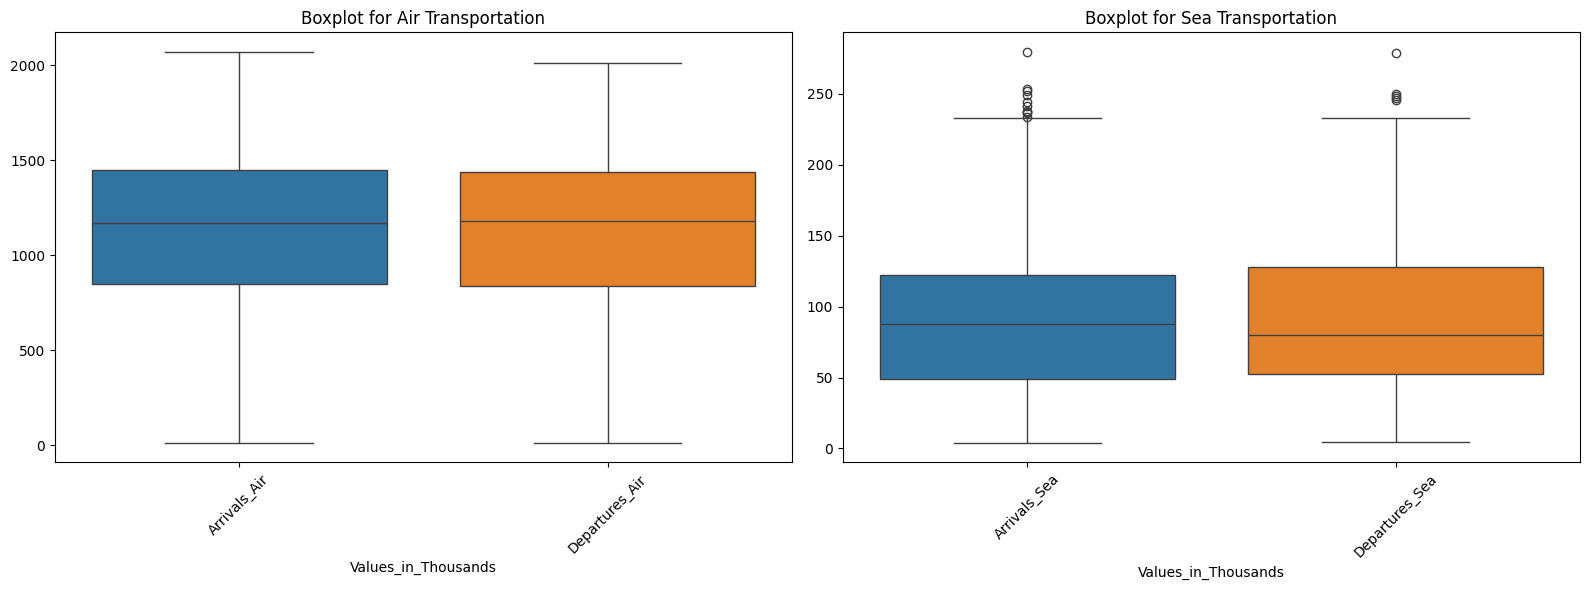

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pivoted is your DataFrame

# Select columns for 'Air' and 'Sea' modes
air_columns = [col for col in df_pivoted.columns if 'Air' in col]
df_air = df_pivoted[air_columns]

sea_columns = [col for col in df_pivoted.columns if 'Sea' in col]
df_sea = df_pivoted[sea_columns]

# Create a figure with 1 row and 2 columns for subplots, not sharing the Y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting boxplots for 'Air' mode on the first subplot
sns.boxplot(data=df_air, ax=axs[0])
axs[0].set_title('Boxplot for Air Transportation')
axs[0].tick_params(axis='x', rotation=45)

# Plotting boxplots for 'Sea' mode on the second subplot
sns.boxplot(data=df_sea, ax=axs[1])
axs[1].set_title('Boxplot for Sea Transportation')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout for better fit and readability
plt.tight_layout()

plt.show()

In [31]:
# Kernel Density Estimate (KDE) Explained

#KDE is a non-parametric way to estimate the probability density function (PDF) of a random variable. 
#It's smooth and not limited to a specific distribution shape (like normal or binomial distributions).

#KDE works by placing a kernel (a smooth, bell-shaped curve) on each data point and then summing all these kernels to produce a smooth estimate of the data's density function.
#The final curve is a weighted sum of those kernels and gives a smoothed estimate of the dataset's density.

#The bandwidth (bw) parameter controls the width of the kernels and thus the smoothness of the density estimate: 
#a larger bandwidth leads to a smoother curve, 
#while a smaller bandwidth leads to a curve that closely follows the data.

#Handling Multimodal* Distributions

#For datasets with more than one mode, 
#the KDE will show peaks at each mode, depending on the chosen bandwidth. 
#A well-chosen bandwidth can reveal the multimodal nature of the data.

#The KDE does not calculate a normal distribution; 
#rather,it estimates the data's density based on the existing data points. 
#If the data is multimodal, 
#the KDE will reflect those modes in its estimate.

In [32]:
# Normal Distribution

#Normal distribution, also known as Gaussian distribution, 
#is characterized by a symmetric bell-shaped curve. 
#It is defined by its mean (μ) and standard deviation (σ).
#We can visually check if a numeric column follows a normal distribution by plotting a histogram and comparing it to a normal distribution curve.

KeyError: 'Arrivals Air'

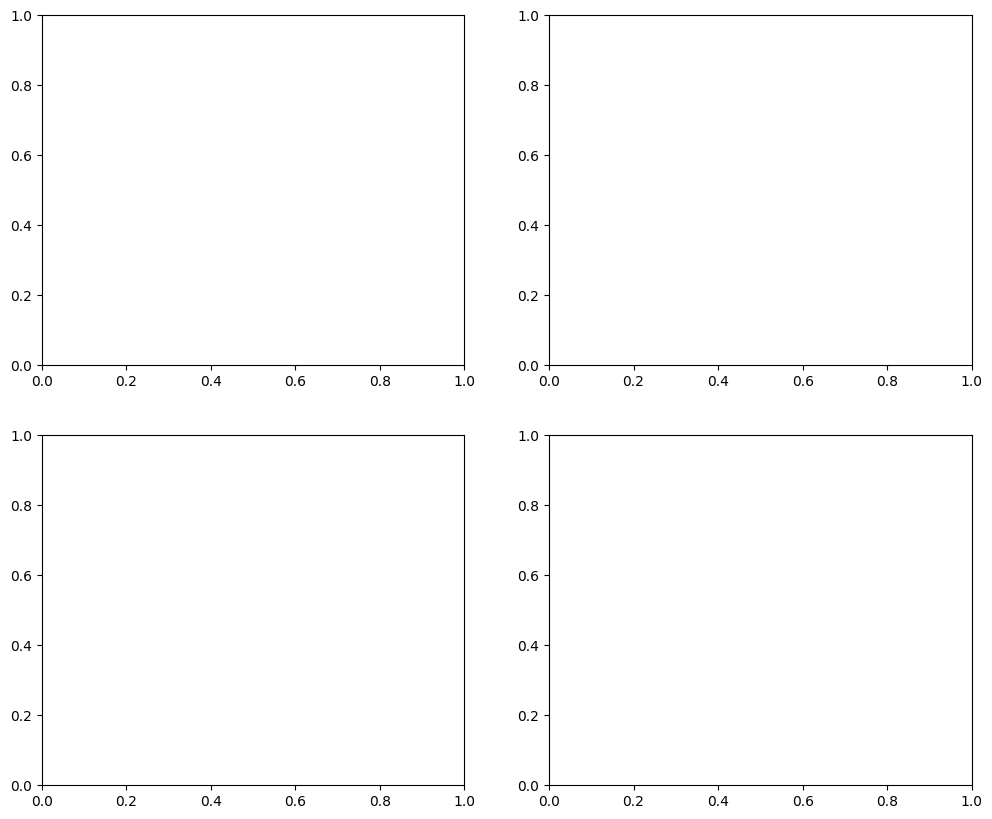

In [33]:
data_columns = ['Arrivals Air', 'Departures Air', 'Arrivals Sea', 'Departures Sea']
titles = ['Arrivals by Air', 'Departures by Air', 'Arrivals by Sea', 'Departures by Sea']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, column, title in zip(axes, data_columns, titles):
    # Plot histogram with KDE
    sns.histplot (df_pivoted[column], bins=10, kde=True, ax=ax, stat="density", label="Data Distribution")
    
    # Calculate mean and standard deviation from the column
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    
    # Generate points on the x axis
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Plot the normal distribution curve
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
    
    # Set titles and labels, and add legend
    ax.set_title(title)
    ax.set_xlabel('Count (in thousands)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Range

#Range is the difference between the maximum and minimum values.
#Calculating the range for each numeric column provides a simple measure of the spread or variability of the data.
#It helps in understanding the extent of variation present in each feature, 
#providing insights into the overall spread of values and potential outliers.

In [ ]:
# Getting Max Values from each column
max_df = df_pivoted.max()

print("\nMax values for: (Thousands)")
print(max_df)

In [ ]:
# Getting Min Values from each column
min_df = df_pivoted.min()

print("\nMin values for: (Thousands)")
print(min_df)

In [ ]:
# Calculating the range for each column in df_pivoted
range_df = df_pivoted.max() - df_pivoted.min()

print("\nRange values for: (Thousands)\n")
print(range_df)

In [ ]:
# Interquartile Range (IQR):

#IQR is the range covered by the middle 50% of the data, 
#calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
#Computing IQR helps in assessing the spread of the central portion of the data distribution, 
#providing a robust measure of variability that is less sensitive to outliers compared to the range.
#It is particularly useful in identifying the presence of outliers and understanding the spread of the bulk of the data within each feature.

In [ ]:
# Calculating the IQR for each column in df_pivoted
Q1 = df_pivoted.quantile(0.25)
Q3 = df_pivoted.quantile(0.75)
IQR = Q3 - Q1

print("\nInter Quartile Range values for: (Thousands)\n")
print(range_df)

In [ ]:
import numpy as np

# Calculate the mean and standard deviation of the 'Arrivals - Air' column
mean_arrivals_air = df_pivoted['Arrivals Air'].mean()
std_arrivals_air = df_pivoted['Arrivals Air'].std()

# Generate a normally distributed dataset with the same mean and standard deviation
normal_arrivals_air = np.random.normal(loc=mean_arrivals_air, scale=std_arrivals_air, size=1000)

# Example: Plot the original data vs. the generated normal distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivoted['Arrivals Air'], fill=True, label='Original Arrivals Air')
sns.kdeplot(normal_arrivals_air, fill=True, label='Generated Normal Distribution', color='red')
plt.legend()
plt.title('Comparison of Original vs. Generated Normal Distribution for Arrivals Air')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


In [ ]:
num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original')
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    normal_data = np.random.normal(loc=mean, scale=std, size=1000)
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

In [ ]:
# n = 10000  # Fixed number of trials for the binomial distribution
# n_cols = 3  # Number of columns in the plot grid
# num_columns = df_pivoted.shape[1]
# n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

# plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

# for i, column in enumerate(df_pivoted.columns, 1):
# plt.subplot(n_rows, n_cols, i)
    
# Original data KDE
# sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
# Approximating 'p' for binomial distribution
# mean = df_pivoted[column].mean()
# p = mean / n  # Simplified approximation, assuming the mean can directly translate to success probability
    
# Adjust 'p' to not exceed 1 in cases where this method oversimplifies
# p = min(p, 1)
    
# Generated binomial distribution data
# binomial_data = np.random.binomial(n, p, size=1000)
# sns.kdeplot(binomial_data, fill=True, label='Generated Binomial', alpha=0.5)
    
# plt.title(column)
# plt.legend()
# plt.tight_layout()

#plt.show()

In [ ]:
#Poisson Distribution:

#Calculate the Mean Rate (λ): The key parameter of the Poisson distribution, 
#λ (lambda), is the average rate of events per interval.

#Poisson probability mass function (PMF) for a range of counts to compare the theoretical distribution with your data.

In [ ]:
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Calculate lambda (mean) for the Poisson distribution from the original data
    lambda_param = df_pivoted[column].mean()
    
    # Generated Poisson distribution data based on the column's mean
    poisson_data = np.random.poisson(lam=lambda_param, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()